## 1번

데이터 확인 및 전처리

1.1 탐색적 데이터 분석 수행(시각화 포함)

1.2 이상치 처리(이상값 대체방안 제시)

1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

데이터 설명(피마 인디안 당뇨병 발병유무)

신체스펙

Pregnancies

Glucose

BloodPressure

SkinThickness

Insulin

BMI

DiabetesPedigreeFunction

Age

발병유무(종속변수) : Outcome

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager,rc
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
warnings.filterwarnings('ignore')
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/data1.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 탐색적 데이터 분석 수행(시각화 포함)

In [39]:
df.info()
# 데이터에 결측치는 존재하지 않는다.
# 종속변수 Outcome 변수는 int형이지만 범주형 변수로 판단된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.Outcome.value_counts()
# 종속변수 확인 결과 클래스 불균형이 보인다.

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
print(df.Outcome.value_counts().index[0],"의 비율",round(df.Outcome.value_counts().values[0]/len(df),2))
print(df.Outcome.value_counts().index[1],"의 비율",round(df.Outcome.value_counts().values[1]/len(df),2))

0 의 비율 0.65
1 의 비율 0.35


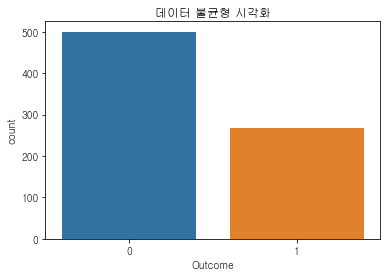

In [42]:
plt.title('데이터 불균형 시각화')
sns.countplot(x='Outcome',data=df)
plt.show()

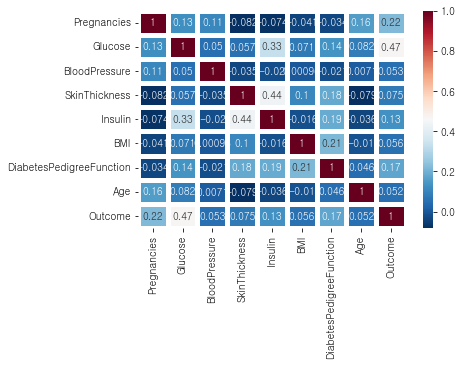

In [43]:
df_cor = df.corr(method='pearson')
sns.heatmap(df_cor, 
           xticklabels=df_cor.columns,
           yticklabels=df_cor.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=5)
plt.show()
# 종속변수를 제외한 독립변수들끼리의 상관계수를 시각화한 결과 0.9이상의 상관관계를 가지는 변수는 없었다. 
# 따라서 모든 변수를 사용하여 모델링해도 될것으로 판단된다.

In [44]:
df1 = df.groupby('Outcome').mean()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,33.044000
1,4.865672,141.257463,107.708955,22.164179,100.335821,72.230597,0.550500,37.067164


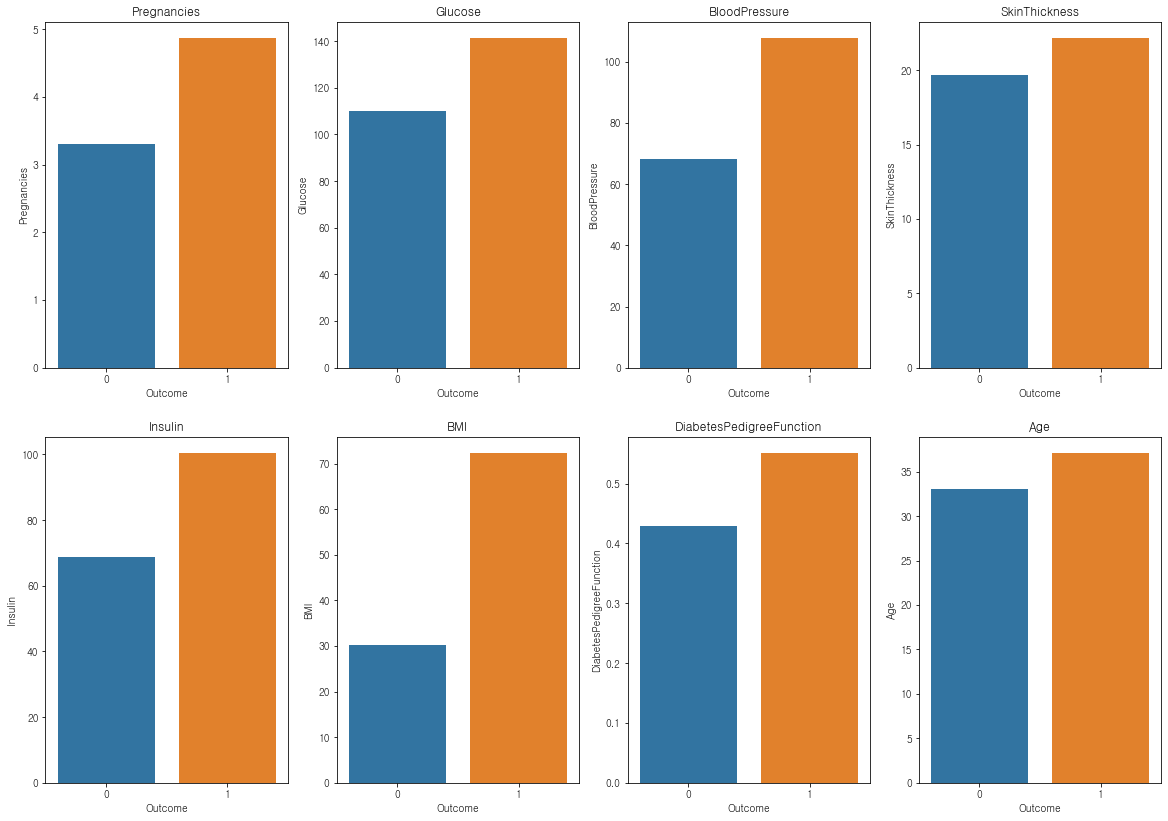

In [45]:
fig, axes = plt.subplots(2,4, figsize=(20,14))

for i in range(4):
    sns.barplot(df1.index, df1.iloc[:,i],ax=axes[0][i])
    axes[0][i].set_title(df1.columns[i])
for i in range(4):
    sns.barplot(df1.index, df1.iloc[:,i+4],ax=axes[1][i])
    axes[1][i].set_title(df1.columns[i+4])
plt.show()

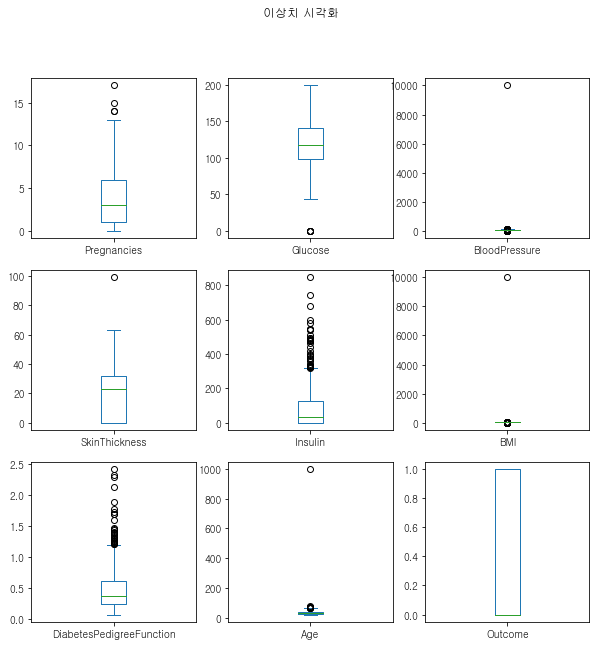

In [46]:
df.plot(kind='box',subplots=True,layout = (3,3),figsize=(10,10),title='이상치 시각화')
plt.show()
# 이상치 확인결과  BloodPressure, age, BMI변수에 이상치들이 보인다. 각 변수의 이상치들을 제외한 max값으로 이상치를 대체한다.

## 1.2 이상치 처리(이상값 대체방안 제시)

In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [48]:
# 앞선 1.1번문제에서 boxplot으로 이상치 확인결과  BloodPressure, age, BMI변수에 이상치들이 보인다. 각 변수의 이상치들을 제외한 max값으로 이상치를 대체한다.
# 추가적으로 BooldPressure, Glucose변수에서 0이 존재하면 안되는데 최솟값이 0인 값이 보인다. 이를 이상치로 판단하고 중앙값으로 대체한다.

In [49]:
# 이상치 최대값으로 대체
df.loc[df.BloodPressure ==df.BloodPressure.max(), 'BloodPressure'] = df[df.BloodPressure !=df.BloodPressure.max()].BloodPressure.max()
df.loc[df.Age ==df.Age.max(), 'Age'] = df[df.Age !=df.Age.max()].Age.max()
df.loc[df.BMI ==df.BMI.max(), 'BMI'] = df[df.BMI !=df.BMI.max()].BMI.max()

In [57]:
# 0의 값을 갖는 이상치 제거
outlier = df[df['Glucose']==0].index
df.loc[outlier,'Glucose']=df.Glucose.median()
outlier = df[df['BloodPressure']==0].index
df.loc[outlier,'BloodPressure']=df.Glucose.median()

In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucosse
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,5.0
mean,3.845052,121.656250,74.447917,20.536458,79.799479,32.002604,0.471876,33.252604,0.348958,117.0
std,3.369578,30.438286,15.291940,15.952218,115.244002,7.923855,0.331329,11.803310,0.476951,0.0
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,117.0
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,117.0
50%,3.000000,117.000000,73.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,117.0
75%,6.000000,140.250000,82.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,117.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,117.0


BloodPressure       AxesSubplot(0.125,0.125;0.168478x0.755)
Age              AxesSubplot(0.327174,0.125;0.168478x0.755)
BMI              AxesSubplot(0.529348,0.125;0.168478x0.755)
Glucose          AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

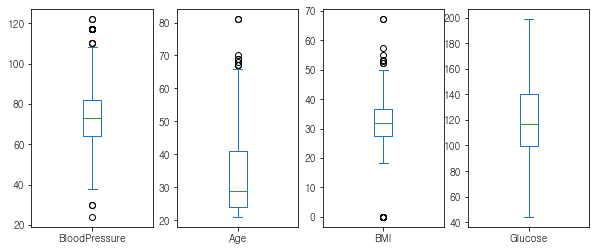

In [59]:
# 이상치 대체후 boxplot
df[['BloodPressure','Age','BMI','Glucose']].plot(kind='box',subplots=True,layout=(1,4),figsize=(10,4))

## 1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성
- describe함수로 변수별 최솟값, 최댓값 확인결과 차이가 많이 나는 컬럼이 존재한다. 따라서 스케일링이 필요하다고 판단된다.

## 2번

1번 문제 데이터 참고하여

2.1 오버샘플링 과정 설명하고 결과 작성

2.2 언더샘플링 과정 설명하고 결과 작성

2.3 둘 중 하나를 선택하고 이유 설명

## 3번

2번 문제 데이터 참고하여

3.1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

3.2 모델 비교하고 결과 설명

3.3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [60]:
#2번,3번 문제  모의고사 2회 파일 참조

## 4번

금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

4.1 연구가설과 귀무가설 작성

4.2 양측 검정 시행

4.3 검정통계량, 가설채택

In [68]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232
...,...
195,100.568703
196,99.082193
197,100.163027
198,99.327200


4.1 연구가설과 귀무가설 작성
- 귀무가설: 금속 재질 함유량의 분산은 1.3이다.
- 연구가설: 금속 재질 함유량의 분산은 1.3이 아니다.

4.2 양측 검정 시행

In [69]:
from scipy import stats
df_var = np.var(df.content)
n = len(df)
sigma = 1.3
alpha=0.05

chi2 = (n-1)*df_var/sigma
p1 = stats.chi2.ppf(alpha/2,n-1)
p2 = stats.chi2.ppf(1-alpha/2,n-1)

print(chi2)
print(p1)
print(p2)

if chi2<= p1 or chi2>=p2:
    print('귀무가설 기각')
else: 
    print('귀무가설 채택')

326.6508365405755
161.82618239364686
239.9596818276442
귀무가설 기각


## 5번

Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

5.1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

5.2 관리도 시각화

In [70]:
# 모의고사 2회 참고

## 6번
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품의 패턴이 임의적인지 확인하라

In [78]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b',"b","a",'a',"b","b","a","b","b"]
df = pd.DataFrame(data, columns=['product'])
df['product'] = df['product'].map({'a':1,'b':0})

In [79]:
df

,product
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [82]:
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(df['product'])

(-1.1144881152070183, 0.26506984027306035)

In [83]:
# p-valuerk 0.05보다 크므로 data는 임의적인 값이다.